In [1]:
import numpy  as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from   sklearn.linear_model  import LinearRegression #线性回归
import sklearn.datasets as datasets#自带数据
#岭回归---样本少的情况，更加精准
from  sklearn.linear_model  import Ridge  #岭回归
from sklearn.linear_model  import  Lasso #拉回归

In [2]:
from  sklearn.metrics import r2_score #评分

In [3]:
np.random.seed(37) #随机数种子

In [4]:
n_train,n_test=50,200 #训练与测试的数量

In [5]:
x=np.random.randn(n_train,n_test) #50*200
x

array([[-0.05446361,  0.67430807,  0.34664703, ..., -0.26269206,
        -0.17305008, -0.0616228 ],
       [-1.79301217, -0.32583333, -0.21422979, ..., -0.96990685,
        -1.297276  , -0.10844137],
       [-2.04809872,  0.37400931, -0.27024766, ..., -0.08857314,
         0.43833666,  0.68340019],
       ..., 
       [-0.91213409, -0.78275588,  0.26149967, ...,  1.34430929,
        -1.0308069 , -1.30925451],
       [ 1.01219341,  1.67471187, -1.38112094, ...,  1.71731434,
         0.23696875,  1.15187187],
       [-1.68565805, -0.85127672, -0.49185303, ..., -0.72555704,
         0.33369825,  0.77013718]])

In [6]:
x.shape

(50, 200)

In [7]:
coef=3*np.random.randn(n_test)
coef

array([ 0.40164626, -2.88435827, -0.31115099, -0.43702925, -3.15206512,
        3.99781144, -4.77690905, -0.80540354, -6.65064779,  0.87568968,
       -3.62778132, -7.34717777, -1.21766104, -4.991616  , -4.17109813,
       -2.82026204,  3.32877812, -0.77157946,  3.84342189, -1.03614146,
       -2.3812229 , -1.93099988, -0.56411832,  2.65054157, -2.00079819,
        2.44572975, -3.96356238,  3.86405413,  4.2940685 ,  0.69259362,
        2.35805072,  2.19867369, -2.34050054, -1.37451572,  0.60084093,
        0.35329683, -3.14464511,  3.52830815,  4.66204479, -0.55362433,
        2.67794239, -0.12925744,  3.66246134,  4.11972891,  2.12595011,
       -0.97043228,  0.53345187, -0.82563634,  5.69446629, -3.13155387,
        0.48751645,  0.21599672, -1.61801993, -7.0150671 ,  0.68415534,
        0.23326555, -1.6483053 ,  6.12291638, -2.57316214, -0.11273205,
       -4.8372546 , -1.52426997,  1.90855083,  6.48199442, -2.57811726,
       -5.04107789,  1.04658919, -2.68161967,  0.92681944, -2.16

In [8]:
coef.shape

(200,)

In [9]:
inds=np.arange(n_test)
inds

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [10]:
np.random.shuffle(inds) #打乱，洗牌

In [12]:
inds

array([156, 116,  95, 119,  86, 103, 129, 191,  40, 183,  22, 179,  57,
       195, 193, 142,  81, 100,  74, 182, 132,  25,  36, 177, 178,  67,
        27,  77,  94, 149, 143, 189, 172, 139,  10, 117,  46,   2,  23,
       171, 109, 190, 101,  75,   5, 127,  70,  18,  26, 153, 181,  41,
       174,  58,  90,  78,  39,   0,  14, 148, 155, 124, 157,  44, 152,
        79, 137, 108,  51, 115, 150, 118, 138, 131, 165,  87, 126,  88,
        97, 130, 162,  45, 141,   7,  93, 134, 133,  99,  52,  32, 146,
        13,  96,  42, 192,  66,  30,   6, 120, 144, 197,  53,  35, 114,
       121,   3,  37, 170, 136,  11, 194,  24,  98,   1, 151,   4,  85,
       106, 160, 180, 102, 169,  16,  55,  73,  17,   9, 128, 113,  48,
        49,  91, 122, 176, 140, 123,  65, 188,  34, 164,  60, 175,  68,
        59, 196,  56,   8,  89,  63,  69, 198, 199,  84,  83, 163, 112,
        72,  28,  54,  76,  31,  71,  15,  82, 159, 125,  43, 154, 135,
        64, 158, 110, 173,  47, 167,  20, 104, 184,  19, 111, 16

In [13]:
coef[inds[10:]]=0
coef

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        2.67794239,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [14]:
#目标
y=np.dot(x,coef)
y

array([  6.73989521,   3.77244866,  12.03040491, -13.53420115,
        15.67823865,  -0.91844959,  -1.07780257,  -2.78426929,
         6.6917913 ,   1.61048477,  -8.13375279,   6.59982246,
        -4.64860745,   0.49340422,  14.46109759,   7.89713032,
         1.47124375,  14.29991892,   4.58373198,   0.37326038,
         3.03089523,  -1.81020598,  -3.55869061,  -0.33792151,
        -2.98136973,   0.42735401,   0.82242193,   9.10532455,
        10.45363067,   9.19143296,  -4.52918511,   3.64042919,
       -12.58507528,   7.27324362,   6.90685325,   1.45392998,
        11.82678909,   0.35631065,  -5.86614729,   4.36098867,
        -3.64095881,   2.19608829,   1.10115916,  -8.90037891,
         3.75729202,  -8.63074149,  12.61706462,   6.12034282,
       -18.56688161, -11.42118679])

In [16]:
y +=  0.01*np.random.normal((n_train,))

In [17]:
y

array([  7.2362145 ,   4.26876795,  12.52672421, -13.03788185,
        16.17455795,  -0.42213029,  -0.58148327,  -2.28795   ,
         7.1881106 ,   2.10680407,  -7.63743349,   7.09614176,
        -4.15228815,   0.98972351,  14.95741689,   8.39344962,
         1.96756304,  14.79623822,   5.08005128,   0.86957968,
         3.52721452,  -1.31388668,  -3.06237132,   0.15839778,
        -2.48505044,   0.92367331,   1.31874123,   9.60164385,
        10.94994997,   9.68775226,  -4.03286581,   4.13674848,
       -12.08875598,   7.76956292,   7.40317254,   1.95024927,
        12.32310838,   0.85262995,  -5.369828  ,   4.85730796,
        -3.14463952,   2.69240758,   1.59747845,  -8.40405962,
         4.25361132,  -8.1344222 ,  13.11338392,   6.61666211,
       -18.07056231, -10.9248675 ])

In [19]:
x

array([[-0.05446361,  0.67430807,  0.34664703, ..., -0.26269206,
        -0.17305008, -0.0616228 ],
       [-1.79301217, -0.32583333, -0.21422979, ..., -0.96990685,
        -1.297276  , -0.10844137],
       [-2.04809872,  0.37400931, -0.27024766, ..., -0.08857314,
         0.43833666,  0.68340019],
       ..., 
       [-0.91213409, -0.78275588,  0.26149967, ...,  1.34430929,
        -1.0308069 , -1.30925451],
       [ 1.01219341,  1.67471187, -1.38112094, ...,  1.71731434,
         0.23696875,  1.15187187],
       [-1.68565805, -0.85127672, -0.49185303, ..., -0.72555704,
         0.33369825,  0.77013718]])

In [20]:
x.shape

(50, 200)

In [21]:
y.shape

(50,)

In [22]:
x_train=x[:30]
y_train=y[:30]

In [23]:
x_test=x[30:]
y_test=y[30:]

In [24]:
#线性回归
lnr=LinearRegression()
lnr.fit(x_train,y_train)#训练
y_newlnr=lnr.predict(x_test) #预测
r2_score(y_test,y_newlnr) #评分

-0.069131489590101403

In [28]:
#岭回归
redge=Ridge( )
redge.fit(x_train,y_train)
y_newridge=redge.predict(x_test)
r2_score(y_test,y_newridge) #评分

-0.072654000205113034

In [29]:
#拉回归
lasso=Lasso()
lasso.fit(x_train,y_train)
y_newlasso=lasso.predict(x_test)
r2_score(y_test,y_newlasso) #评分

0.48173274573803926

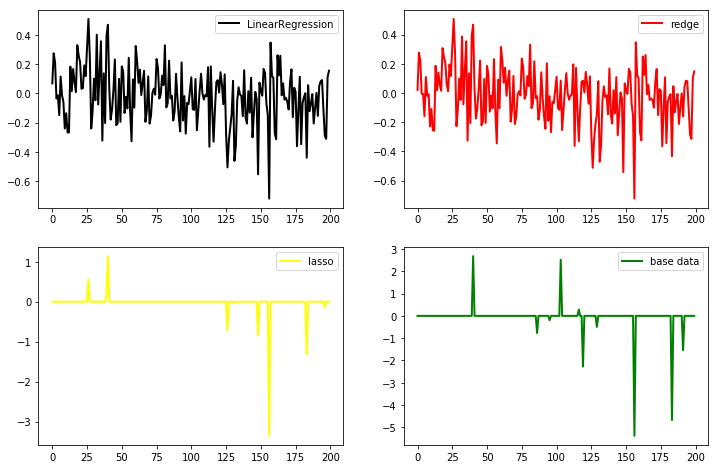

In [30]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(lnr.coef_,color="black",lw=2,
         label="LinearRegression")
plt.legend()

plt.subplot(2,2,2)
plt.plot(redge.coef_,color="red",lw=2,
         label="redge")
plt.legend()

plt.subplot(2,2,3)
plt.plot(lasso.coef_,color="yellow",lw=2,
         label="lasso")
plt.legend()

plt.subplot(2,2,4)
plt.plot(coef,color="green",lw=2,
         label="base data")
plt.legend()

plt.show()